# Cofee Shop Sales Analisys

## Introducere

Acest set de date este ideal pentru a explora tendintele de vanzari in evolutie de-a lungul timpului, pentru a identifica zilele de varf de trafic al clientilor si pentru a explora valorile de performanta ale diferitelor produse. Setul de date cuprinde inregistrari tranzactionale de la Maven Roasters, o cafenea fictiva din New York care opereaza in trei locatii distincte. Acesta cuprinde detalii complete, cum ar fi datele tranzactiei, marcajele de timp, specificul geografic si informatiile la nivel de produs. Cercetatorii pot analiza frecventa vanzarilor de produse, pot identifica principalii factori de venit si pot investiga factorii care contribuie la fluctuatiile volumului vanzarilor.

## Cunoasterea Bazei de date

### Importuri

In [88]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib as plt

### Citirea Bazei de Date si afisarea aceteia

In [89]:
df=pd.read_csv("coffee-shop-sales-revenue.csv",sep="|")
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


### Tipul coloanelor


In [90]:
df.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
transaction_qty       int64
store_id              int64
store_location       object
product_id            int64
unit_price          float64
product_category     object
product_type         object
product_detail       object
dtype: object

### Descrierea bazei de date

In [91]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


### Valorie unice din coloane(cate sunt)

In [92]:
file_path = r"coffee-shop-sales-revenue.csv"
df = pd.read_csv(file_path, sep="|")
df=pd.DataFrame(df.nunique(), columns=['Unique values Count'])
print(df)

                  Unique values Count
transaction_id                 149116
transaction_date                  181
transaction_time                25762
transaction_qty                     6
store_id                            3
store_location                      3
product_id                         80
unit_price                         41
product_category                    9
product_type                       29
product_detail                     80


### Verificarea valorilor NULL sau NaN in Baza de date


In [93]:
missing_values = df.isnull().sum()

print("Valori lipsa in fiecare coloana:")
print(missing_values)

rows_with_missing_values = df[df.isnull().any(axis=1)]

print("\n Randuri cu valori lipsa:")
print(rows_with_missing_values)

Valori lipsa in fiecare coloana:
Unique values Count    0
dtype: int64

 Randuri cu valori lipsa:
Empty DataFrame
Columns: [Unique values Count]
Index: []


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, transaction_id to product_detail
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unique values Count  11 non-null     int64
dtypes: int64(1)
memory usage: 476.0+ bytes


### Eliminarea valorilor Null sau Nan si a randurilor duplicate

In [95]:
df=df.dropna()
df=df.drop_duplicates()
df

,Unique values Count
transaction_id,149116
transaction_date,181
transaction_time,25762
transaction_qty,6
store_id,3
product_id,80
unit_price,41
product_category,9
product_type,29


### Verific daca sunt randuri duplicate

In [96]:
verif_duplicates=df.duplicated().any()
verif_duplicates

np.False_

### Histograme pentru coloanele numerice

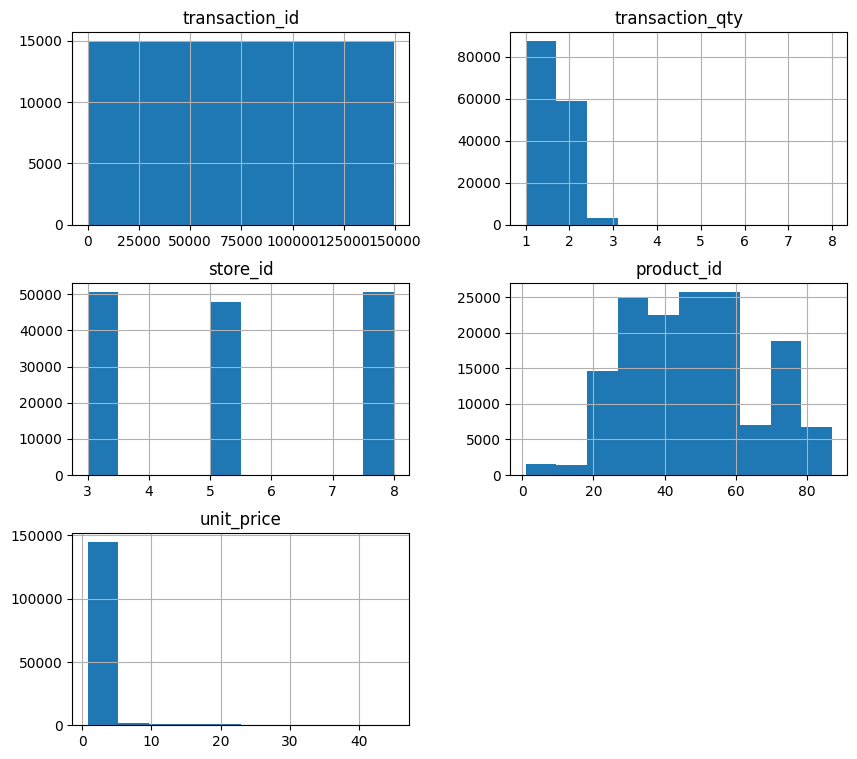

In [97]:
df=pd.read_csv("coffee-shop-sales-revenue.csv",sep="|")
import matplotlib.pyplot as plT
numeric_cols = df.select_dtypes(include=['number']).columns
nr = 10
df[numeric_cols].hist(figsize=(10, 9), bins=nr)

plT.show()

### Histograme pentru store_id 3

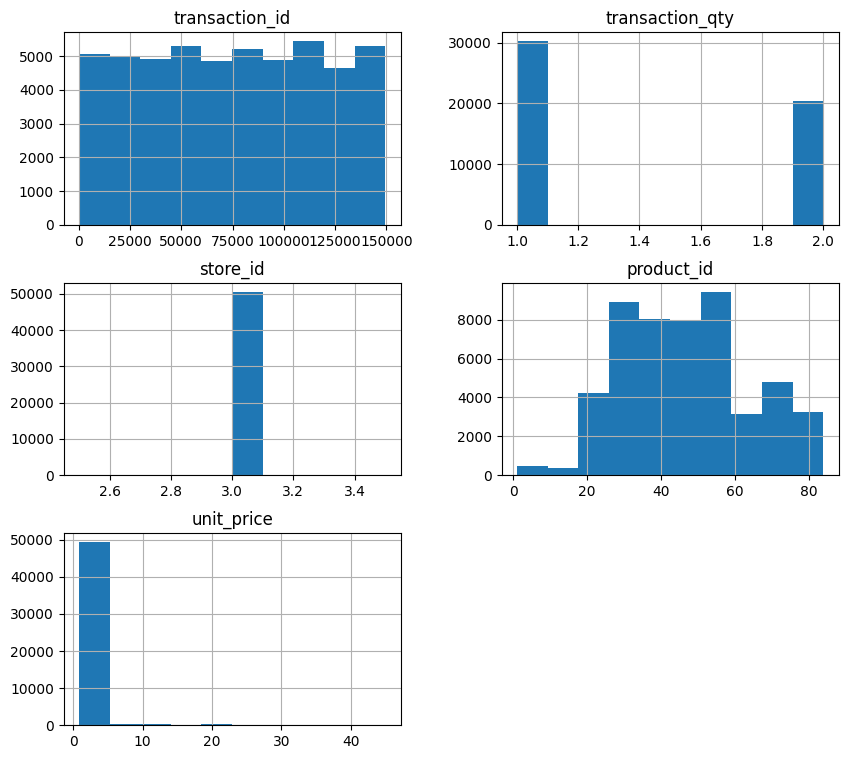

In [98]:
df=pd.read_csv("coffee-shop-sales-revenue.csv",sep="|")
filtered_df_store_id_3 = df[df['store_id'] == 3]
nr = 10
filtered_df_store_id_3[numeric_cols].hist(figsize=(10, 9), bins=nr)
plT.show()

### Histograme pentru store_id 5

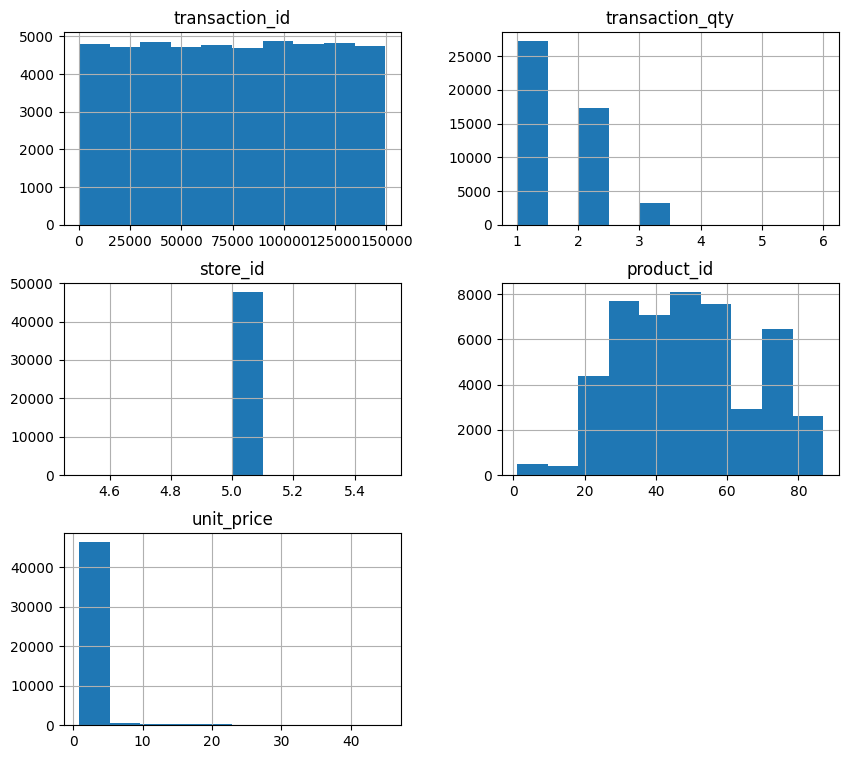

In [99]:
filtered_df_store_id_5 = df[df['store_id'] == 5]
nr = 10 
filtered_df_store_id_5[numeric_cols].hist(figsize=(10, 9), bins=nr)

plT.show()

### Histograme pentru store_id 8

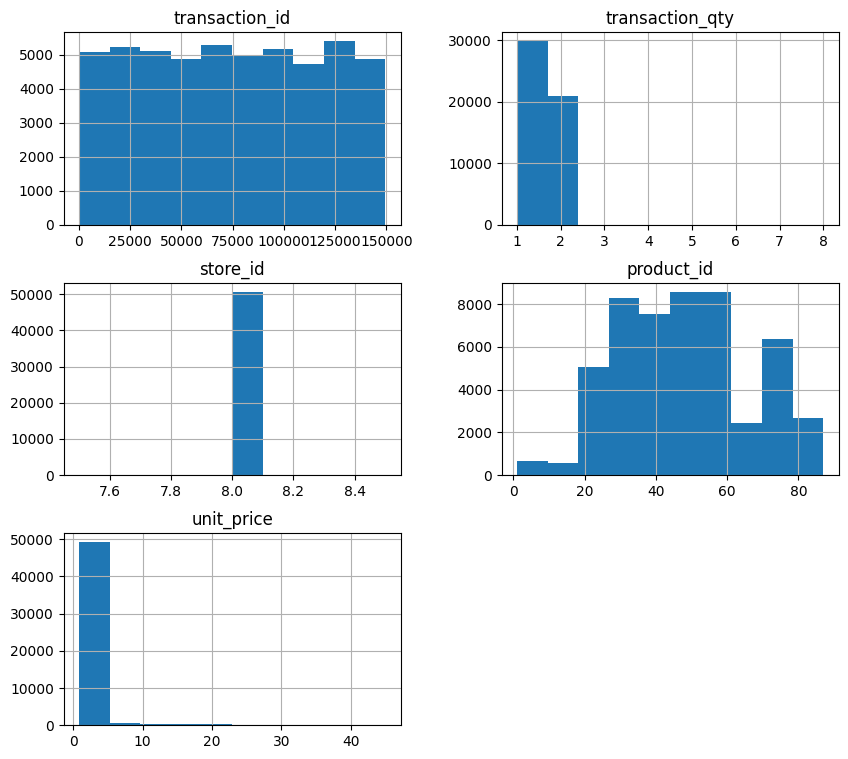

In [100]:
filtered_df_store_id_8= df[df['store_id'] == 8]
nr = 10  
filtered_df_store_id_8[numeric_cols].hist(figsize=(10, 9), bins=nr)
plT.show()

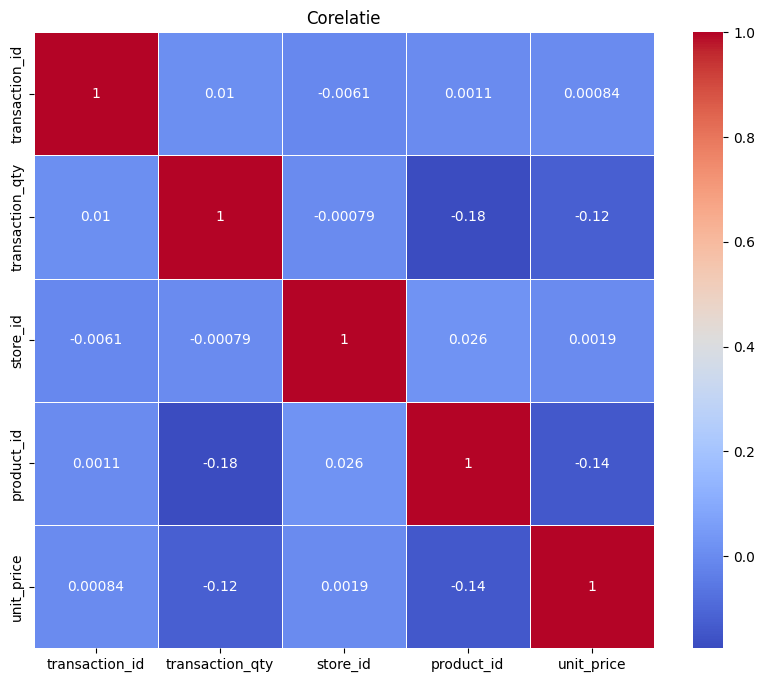

In [104]:

df = pd.read_csv("coffee-shop-sales-revenue.csv", sep="|")
# Selectarea coloanelor numerice
numeric_df = df.select_dtypes(include=['number'])

# Calcularea matricei de corelatie
correlation_matrix = numeric_df.corr()


# print("Corelatie:")
# print(correlation_matrix)

plT.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plT.title('Corelatie')
plT.show()